# **Propensity Model**


Can you identify the potential leads for a D2C startup?


## **Problem Statement**


A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 


Leads are captured in 2 ways - Directly and Indirectly. 


Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.


Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.


Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.



## **About Dataset**


You are provided with the leads data of last year containing both direct and indirect leads. Each lead provides information about their activity on the platform, signup information and campaign information. Based on his past activity on the platform, you need to build the predictive model to classify if the user would buy the product in the next 3 months or not.



## **Data Dictionary**


You are provided with 3 files - train.csv, test.csv and sample_submission.csv



## **Training set**


train.csv contains the leads information of last 1 year from Jan 2021 to Dec 2021. And also the target variable indicating if the user will buy the product in next 3 months or not 



Variable

Description

id

Unique identifier of a lead

created_at

Date of lead dropped

signup_date

Sign up date of the user on the website

campaign_var (1 and 2)

campaign information of the lead

products_purchased

No. of past products purchased at the time of dropping the lead

user_activity_var (1 to 12)

Derived activities of the user on the website

buy
# New Section
0 or 1 indicating if the user will buy the product in next 3 months or not 



# **Test set**


test.csv contains the leads information of the current year from Jan 2022 to March 2022. You need to predict if the lead will buy the product in next 3 months or not.



Variable

Description

id

Unique identifier of a lead

created_at

Date of lead dropped

signup_date

Sign up date of the user on the website

campaign_var (1 and 2)

Campaign information of the lead

products_purchased

No. of past products purchased at the time of dropping the lead

user_activity_var (1 to 12) 

Derived activities of the user on the website










*   List item
*   List item



## **What is propensity modeling?**

Propensity modeling attempts to predict the likelihood that visitors, leads, and customers will perform certain actions. It’s a statistical approach that accounts for all the independent and confounding variables that affect said behavior.

So, for example, propensity modeling can help a marketing team predict the likelihood that a lead will convert to a customer. Or that a customer will churn. Or even that an email recipient will unsubscribe.

The propensity score, then, is the probability that the visitor, lead, or customer will perform a certain action. 

In [ ]:
import pandas as pd 
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression, SGDRegressor, RidgeClassifier, SGDClassifier
from sklearn.metrics import r2_score, accuracy_score, f1_score, recall_score, precision_score, plot_confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from lightgbm import LGBMRegressor, LGBMClassifier 

from catboost import CatBoostClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

import joblib

import random

In [ ]:
def score_(y_true, y_pred): 
    a = recall_score(y_true, y_pred, zero_division=1)
    b = precision_score(y_true, y_pred, zero_division=1)
    c = f1_score(y_true, y_pred, zero_division=1)
    print(a, b, c)  

In [ ]:
# Load the data
# dataset = os.path.join(os.getcwd(), 'UCI_Credit_Card.csv')
# print(dataset)
# df = pd.read_csv(dataset)
# print(df.head())

from google.colab import files
 
uploaded = files.upload()

Saving train_wn75k28.csv to train_wn75k28 (2).csv
Saving test_Wf7sxXF.csv to test_Wf7sxXF (2).csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['train_wn75k28.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test_Wf7sxXF.csv']))


In [ ]:
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

(                 id  campaign_var_1  campaign_var_2  products_purchased  \
 count  39161.000000    39161.000000    39161.000000        18250.000000   
 mean   19581.000000        6.523812        6.452746            2.154137   
 std    11304.951283        3.472944        2.614296            0.779815   
 min        1.000000        1.000000        1.000000            1.000000   
 25%     9791.000000        4.000000        5.000000            2.000000   
 50%    19581.000000        6.000000        6.000000            2.000000   
 75%    29371.000000        9.000000        8.000000            3.000000   
 max    39161.000000       16.000000       15.000000            4.000000   
 
        user_activity_var_1  user_activity_var_2  user_activity_var_3  \
 count         39161.000000         39161.000000         39161.000000   
 mean              0.400092             0.006716             0.102832   
 std               0.509194             0.081676             0.303743   
 min               0.0

In [ ]:
df_test.describe(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

(                 id  campaign_var_1  campaign_var_2  products_purchased  \
 count  13184.000000    13184.000000    13184.000000         5048.000000   
 mean   45753.500000        7.724439        7.943416            2.108954   
 std     3806.037309        3.599981        2.687832            0.783483   
 min    39162.000000        1.000000        1.000000            1.000000   
 25%    42457.750000        5.000000        6.000000            2.000000   
 50%    45753.500000        8.000000        8.000000            2.000000   
 75%    49049.250000       10.000000       10.000000            3.000000   
 max    52345.000000       16.000000       15.000000            4.000000   
 
        user_activity_var_1  user_activity_var_2  user_activity_var_3  \
 count         13184.000000         13184.000000         13184.000000   
 mean              0.386681             0.004248             0.103307   
 std               0.505653             0.065037             0.304371   
 min               0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


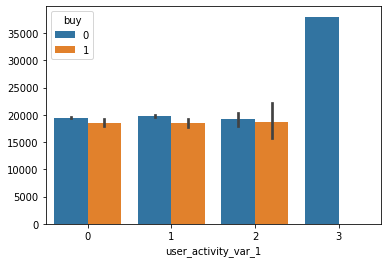

In [ ]:
sns.barplot(df.user_activity_var_1, df.index, df.buy)


In [ ]:
df.loc[df.products_purchased==1][df.buy==1]["id"].count(), df.loc[df.products_purchased==1][df.buy==0]["id"].count(),
df.loc[df.products_purchased==4][df.buy==1]["id"].count(), df.loc[df.products_purchased==4][df.buy==0]["id"].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(74, 642)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


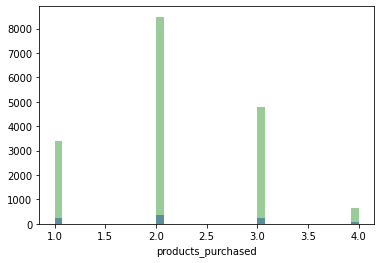

In [ ]:
sns.distplot(df.loc[df.buy==1]['products_purchased'], kde = False, color ='blue', bins = 39)
sns.distplot(df.loc[df.buy==0]['products_purchased'], kde = False, color ='green', bins = 39)

In [ ]:

df.products_purchased.value_counts()
df.groupby("products_purchased").buy.count()
df.pivot_table(index="products_purchased", values="buy")

,buy
products_purchased,
1.0,0.066429
2.0,0.043194
3.0,0.050557
4.0,0.103352


## **Feature Encoding**

In machine learning projects, one important part is feature engineering. It is very common to see categorical features in a dataset. However, our machine learning algorithm can only read numerical values. It is essential to encoding categorical features into numerical values[28]

Encode labels with value between 0 and n_classes-1 LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [ ]:
df.pivot_table(index="user_activity_var_1", values="buy"), df.user_activity_var_1.unique(), df.groupby("user_activity_var_1")["buy"].count()

(                          buy
 user_activity_var_1          
 0                    0.044283
 1                    0.059395
 2                    0.147059
 3                    0.000000, array([0, 1, 2, 3]), user_activity_var_1
 0    23869
 1    14917
 2      374
 3        1
 Name: buy, dtype: int64)

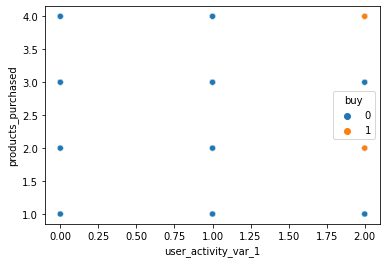

In [ ]:
sns.scatterplot(data=df, x="user_activity_var_1", y="products_purchased", hue="buy")


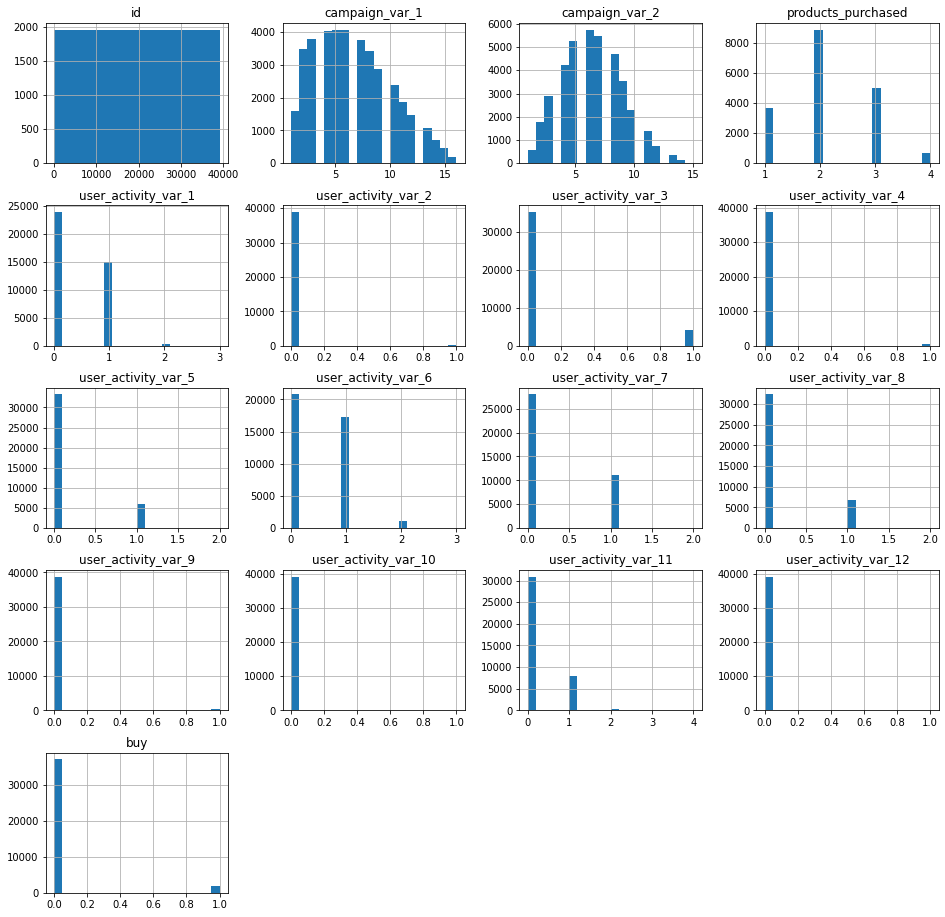

In [ ]:
df.hist(bins = 20, figsize = (16, 16))
plt.show()

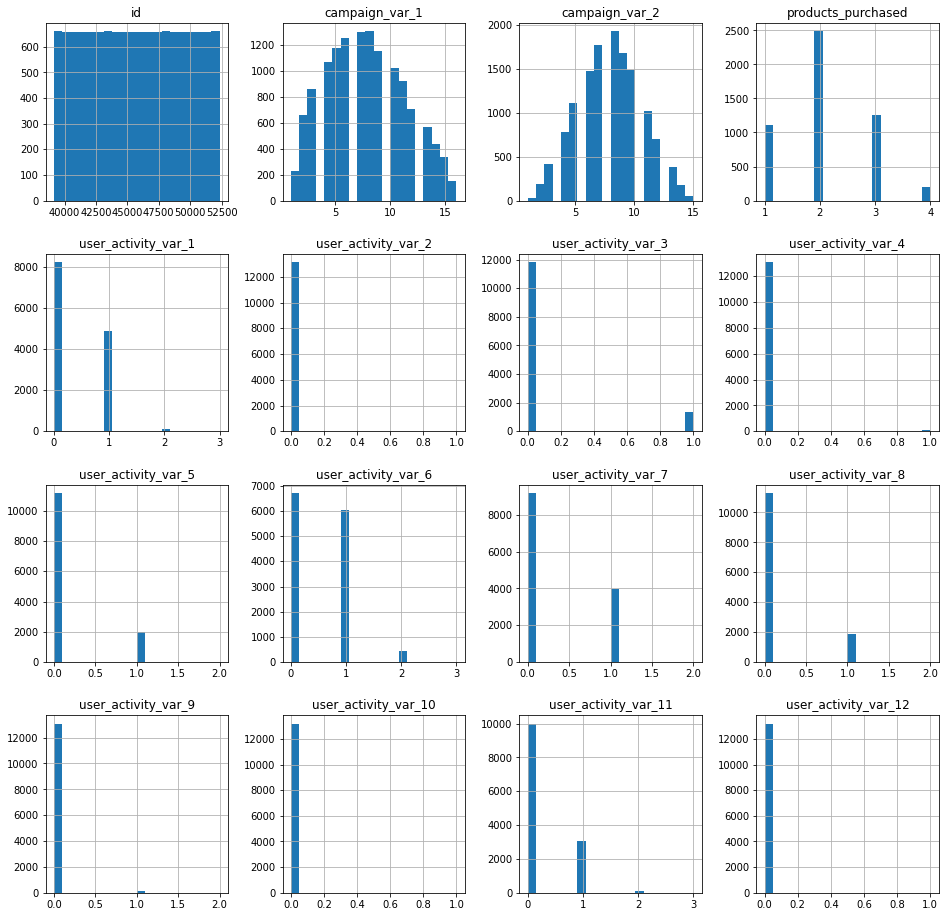

In [ ]:
df_test.hist(bins = 20, figsize = (16, 16))
plt.show()


In [ ]:
df.corr('pearson')

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,1.000000,0.143723,0.222746,-0.027862,0.012223,-0.011075,-0.000572,-0.015203,-0.006575,0.013992,0.016137,-0.035218,-0.019808,0.001002,0.025785,-0.009223,-0.020762
campaign_var_1,0.143723,1.000000,0.561489,-0.014415,0.024100,-0.034548,-0.012670,-0.033510,-0.023116,0.029665,-0.072600,-0.014276,-0.058264,-0.004831,-0.022000,-0.006369,-0.087202
campaign_var_2,0.222746,0.561489,1.000000,0.021305,-0.032969,-0.039833,-0.008046,-0.038928,-0.030990,0.067304,-0.053462,-0.033848,-0.057942,-0.009879,-0.003890,-0.008228,-0.080064
products_purchased,-0.027862,-0.014415,0.021305,1.000000,-0.009479,0.011023,0.000775,0.010831,-0.007867,0.001855,0.008707,-0.005779,0.008816,0.004380,-0.003545,-0.007717,0.004140
user_activity_var_1,0.012223,0.024100,-0.032969,-0.009479,1.000000,0.014599,-0.025950,0.016656,-0.015441,-0.190784,-0.085343,-0.047157,0.034783,0.012811,-0.062915,0.002535,0.044811
user_activity_var_2,-0.011075,-0.034548,-0.039833,0.011023,0.014599,1.000000,-0.001075,0.132108,0.060982,-0.005297,-0.020153,-0.035306,0.155794,0.046324,0.085794,0.024440,0.354627
user_activity_var_3,-0.000572,-0.012670,-0.008046,0.000775,-0.025950,-0.001075,1.000000,0.003023,0.023117,-0.050132,-0.006306,-0.025562,0.003898,0.019152,-0.027212,0.013261,0.005174
user_activity_var_4,-0.015203,-0.033510,-0.038928,0.010831,0.016656,0.132108,0.003023,1.000000,0.071339,-0.021669,-0.004572,-0.039370,0.204941,0.046924,0.067085,0.037937,0.394706
user_activity_var_5,-0.006575,-0.023116,-0.030990,-0.007867,-0.015441,0.060982,0.023117,0.071339,1.000000,-0.078928,-0.007705,-0.031585,0.074189,0.028037,0.021225,0.022972,0.164972
user_activity_var_6,0.013992,0.029665,0.067304,0.001855,-0.190784,-0.005297,-0.050132,-0.021669,-0.078928,1.000000,-0.169651,-0.062460,-0.013304,0.001175,-0.076816,0.001938,-0.010951


In [ ]:
df.corr('spearman')

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,1.000000,0.142087,0.220371,-0.028400,0.012949,-0.011075,-0.000572,-0.015203,-0.006248,0.012393,0.016534,-0.035104,-0.019808,0.001002,0.024832,-0.009223,-0.020762
campaign_var_1,0.142087,1.000000,0.549940,-0.014833,0.023421,-0.034097,-0.013067,-0.032212,-0.023738,0.030240,-0.071672,-0.013999,-0.059322,-0.004128,-0.017583,-0.007973,-0.084778
campaign_var_2,0.220371,0.549940,1.000000,0.018652,-0.031713,-0.041438,-0.006243,-0.039196,-0.029180,0.065231,-0.053994,-0.031639,-0.060705,-0.010043,0.000089,-0.009819,-0.080723
products_purchased,-0.028400,-0.014833,0.018652,1.000000,-0.009012,0.007648,-0.000692,0.007785,-0.008822,0.000102,0.008238,-0.004797,0.005806,0.004009,-0.006361,-0.007513,-0.001133
user_activity_var_1,0.012949,0.023421,-0.031713,-0.009012,1.000000,0.012949,-0.025742,0.016672,-0.016439,-0.189671,-0.083998,-0.046627,0.033290,0.013434,-0.064994,0.002893,0.041093
user_activity_var_2,-0.011075,-0.034097,-0.041438,0.007648,0.012949,1.000000,-0.001075,0.132108,0.060555,-0.004721,-0.020096,-0.035314,0.155794,0.046324,0.073242,0.024440,0.354627
user_activity_var_3,-0.000572,-0.013067,-0.006243,-0.000692,-0.025742,-0.001075,1.000000,0.003023,0.023334,-0.050317,-0.006011,-0.025522,0.003898,0.019152,-0.028507,0.013261,0.005174
user_activity_var_4,-0.015203,-0.032212,-0.039196,0.007785,0.016672,0.132108,0.003023,1.000000,0.070581,-0.022081,-0.004330,-0.039376,0.204941,0.046924,0.056291,0.037937,0.394706
user_activity_var_5,-0.006248,-0.023738,-0.029180,-0.008822,-0.016439,0.060555,0.023334,0.070581,1.000000,-0.079678,-0.007619,-0.031366,0.071734,0.028164,0.013263,0.023083,0.161431
user_activity_var_6,0.012393,0.030240,0.065231,0.000102,-0.189671,-0.004721,-0.050317,-0.022081,-0.079678,1.000000,-0.169510,-0.062064,-0.013123,0.001855,-0.077975,0.002799,-0.010080


In [ ]:
X = df.drop('buy',axis=1)
y = df["buy"]

In [ ]:
#"signup_date"
columns = ["created_at", "signup_date"]
df_ = df.drop(columns = columns).copy()

In [96]:
# #"signup_date"
# columns = ["created_at", "signup_date", "campaign_var_1", "campaign_var_2", "products_purchased", "user_activity_var_2", "user_activity_var_3", "user_activity_var_4", "user_activity_var_5", "user_activity_var_6", "user_activity_var_7", "user_activity_var_8", "user_activity_var_9", "user_activity_var_10", "user_activity_var_11", "user_activity_var_12"]
# df_test_ = df_test.drop(columns = columns).copy()

#"signup_date"
columns = ["created_at", "signup_date"]
df_test_ = df_test.drop(columns = columns).copy()

In [97]:
df_test_ = df_test_.dropna()
df_test_

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
1,39163,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0
3,39165,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0
6,39168,2,4,1.0,1,0,0,0,0,0,0,0,0,0,0,0
11,39173,3,6,2.0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,52326,6,8,3.0,2,0,0,0,0,1,0,0,0,0,0,0
13168,52330,14,10,3.0,1,0,1,0,1,0,0,0,0,0,0,0
13171,52333,13,10,2.0,0,0,0,0,0,0,0,0,0,0,1,0
13176,52338,3,8,1.0,0,0,0,0,0,0,1,0,0,0,1,0


In [98]:
df_ = df_.dropna()
df_

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,3,4,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39154,39155,7,11,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0
39156,39157,11,11,2.0,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,3,9,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,8,7,2.0,1,0,0,0,1,0,1,0,0,0,0,0,0


In [ ]:
muty = SelectKBest(score_func=mutual_info_classif, k=4)
muty.fit(df_.values[:,1:-1], df_.values[:, -1])
X_train_muty = muty.transform(df_.values[:,1:-1])

muty.scores_, X_train_chi 

(array([0.00357177, 0.00475516, 0.00220259, 0.00115789, 0.0209874 ,
        0.00028711, 0.02258043, 0.00716546, 0.00313296, 0.00086501,
        0.00390322, 0.03626909, 0.00017661, 0.03120151, 0.00268488]),
 array([[1., 0., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0.],
        [9., 0., 0., 0., 0., 0.],
        ...,
        [3., 0., 0., 0., 0., 0.],
        [8., 0., 0., 1., 0., 0.],
        [7., 0., 0., 0., 0., 1.]]))

In [ ]:
chi = SelectKBest(score_func=chi2, k=6)
chi.fit(df_.values[:,1:-1], df_.values[:, -1])
X_train_chi = chi.transform(df_.values[:,1:-1])
# X_test_chi = fs.transform(df_test)
chi.scores_

array([1.95376518e+02, 9.50061256e+01, 8.83003491e-02, 3.08764665e+01,
       2.25060651e+03, 3.91172203e-01, 2.60646217e+03, 3.89450672e+02,
       5.06456983e-02, 1.05901105e+01, 1.16515513e+02, 4.22896222e+03,
       1.81500525e+02, 1.06163638e+03, 1.30397694e+02])

In [99]:
chi = SelectKBest(score_func=chi2, k=6)
chi.fit(df_test_.values[:,1:-1], df_test_.values[:, -1])
X_test_chi = chi.transform(df_test_.values[:,1:-1])
# X_test_chi = fs.transform(df_test)
chi.scores_

array([1.42118913e+00, 2.85182890e+00, 5.62996393e-03, 1.08139523e+00,
       5.15157519e-03, 1.06994254e-01, 7.72736279e-03, 1.61283931e-01,
       5.32197345e-01, 1.37663260e+00, 1.17099267e-01, 1.26808005e-02,
       3.96275015e-04, 1.88818808e+00])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_chi, df_.values[:, -1], test_size = 0.7)

In [ ]:
#X_train_ = np.vectorize(float(X_train))
#y_train_ = float(y_train)

In [ ]:
# X_train,X_val, y_train,y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# print("The shape of X_train is      ", X_train.shape)
# print("The shape of X_test is       ",X_val.shape)
# print("The shape of y_train is      ",y_train.shape)
# print("The shape of y_test is       ",y_val.shape)

0.4534711964549483 0.9808306709265175 0.6202020202020202


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


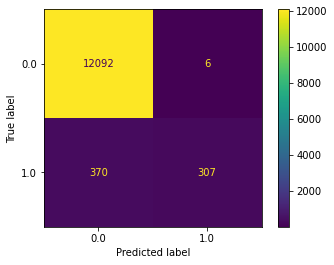

In [ ]:
log_reg = LogisticRegression().fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
score_(y_test, y_pred)
plot_confusion_matrix(log_reg, X_test, y_test) 

In [ ]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

y_pred_xgb = model.predict(X_test)
score_(y_test, y_pred_xgb)

0.5243722304283605 0.9466666666666667 0.6749049429657794


0.5228951255539144 0.9619565217391305 0.6775119617224881


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


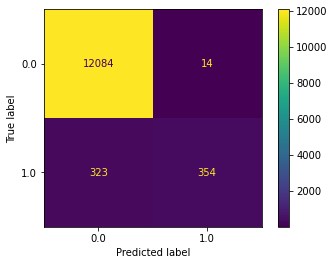

In [ ]:
rfc_class = RandomForestClassifier(n_estimators = 1000, max_features= 'auto', criterion= 'entropy')
rfc_class.fit(X_train, y_train)
y_pred_class_rfc = rfc_class.predict(X_test)
score_(y_test, y_pred_class_rfc)
plot_confusion_matrix(rfc_class, X_test, y_test)

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.005,
max_depth=1).fit(X_train, y_train)

y_test_class_gbc = gbc.predict(X_test)
score_(y_test, y_test_class_gbc)

0.45790251107828656 1.0 0.6281661600810536


0.6425406203840472 0.5576923076923077 0.5971173644474949


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


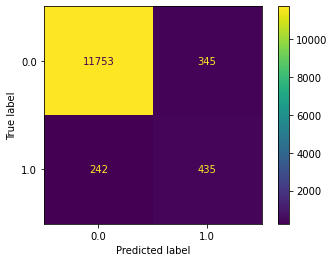

In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', C= 1, class_weight= {1: 0.9, 0: 0.1}, penalty= 'l2', solver= 'lbfgs').fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
score_(y_test, y_pred)
plot_confusion_matrix(log_reg, X_test, y_test) 

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98     12098
         1.0       1.00      0.09      0.17       677

    accuracy                           0.95     12775
   macro avg       0.98      0.55      0.57     12775
weighted avg       0.95      0.95      0.93     12775



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


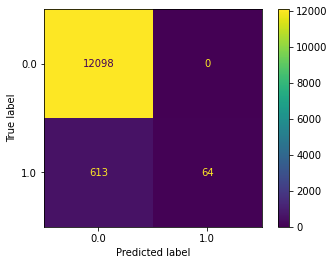

In [ ]:
knn = KNeighborsClassifier(10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(knn, X_test, y_test)

In [ ]:
from tensorflow import keras
import tensorflow as tf

from tensorflow.python.keras.layers import Input, Dense, Dropout, LSTM, Flatten, RepeatVector, Conv1D, MaxPool1D, MaxPooling1D
from tensorflow.python.keras.models import Sequential

from tensorflow.keras.layers.experimental import preprocessing

tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]





In [ ]:
model1 = Sequential()
model1.add(Dense(units = 4, activation="relu")) 
#model1.add(Dropout(0.2))
model1.add(Dense(units = 8, activation="relu")) 
#model1.add(Dropout(0.2))
model1.add(Dense(units = 16, activation="relu")) 
#model1.add(Dropout(0.2))
model1.add(Dense(units = 8, activation="relu"))
#model1.add(Dropout(0.1))
#model.add(Flatten())
model1.add(Dense(units = 1, activation="sigmoid"))

In [ ]:
# optimizer = tf.keras.optimizers.Adam(lr=0.001)
# model1.compile(optimizer = optimizer, loss = keras.losses.BinaryCrossentropy(), metrics = METRICS)
# model1.fit(X_train, y_train, epochs =16, batch_size = 15)

In [ ]:
# Try an ensemble model - Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve
eclf = VotingClassifier(estimators=[('log', log_reg), ('rfc', rfc_class), ('gbc', gbc)], voting='hard')

eclf1 = eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     12098
         1.0       0.96      0.52      0.68       677

    accuracy                           0.97     12775
   macro avg       0.97      0.76      0.83     12775
weighted avg       0.97      0.97      0.97     12775



In [95]:
df_test_["buy"] = eclf.predict(X_test_chi)

In [91]:
output = df_test_["buy"]

In [92]:
output.to_csv("./output.csv")